<a href="https://colab.research.google.com/github/georgywasiat/Indonesia-Hoax-News-Analysis-LDA-LSTM-Predictive-Topic-Modeling/blob/main/Hoax_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Georgy Banny Rizky Wasiat

Integrating latent dirichlet allocation (LDA) Topic Modeling and  Long short term memory (LSTM) for Predictive Analysis of Indonesia Hoax News

In [1]:
from google.colab import drive
import pandas as pd

In [2]:
!pip install Sastrawi
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Unduh sumber daya NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
hoax1 = pd.read_csv('/content/drive/My Drive/Portofolio/hoax_news.csv')

hoax1 = pd.DataFrame(hoax1)

hoax = hoax1[['judul', 'label']]

hoax = pd.DataFrame(hoax)

In [11]:
# Mengganti nilai 1 dengan 'hoax' dan nilai 0 dengan 'real' pada kolom tertentu (misalnya, kolom 'label')
hoax['label'] = hoax_df['label'].replace({1: 'hoax', 0: 'real'})

In [12]:
hoax.head(50)

,judul,label
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,hoax
1,Instruksi Gubernur Jateng tentang penilangan ...,hoax
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,hoax
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...",hoax
4,Foto Kadrun kalo lihat foto ini panas dingin,hoax
5,event promo smartphone JNE 2020 spesial di bul...,hoax
6,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,hoax
7,Foto Presiden Italia menangis karena tak cukup...,hoax
8,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",hoax
9,Video Polisi china telah menganiaya wanita uig...,hoax


In [13]:
# Tentukan kolom teks dan label sentimen
text_column = 'judul'
sentiment_column = 'label'

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus karakter yang tidak diperlukan, tanda baca, atau simbol khusus
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))

    # Normalisasi teks: mengubah huruf kapital menjadi huruf kecil
    text = text.lower()

    # Menghapus kata-kata tidak relevan atau noise (contoh: kata dengan panjang kurang dari 3)
    text = ' '.join(word for word in text.split() if len(word) > 2)

      # Menghapus kata "subject"
    text = text.replace('subject', '')

    return text

# Terapkan fungsi ke kolom teks pada dataset
hoax[text_column] = hoax[text_column].apply(clean_text)

# Cetak informasi dataset setelah pembersihan teks
print(hoax[[text_column, sentiment_column]].head(20))

                                                judul label
0   pemakaian masker menyebabkan penyakit legionna...  hoax
1   instruksi gubernur jateng tentang penilangan b...  hoax
2   foto jim rohn jokowi adalah presiden terbaik d...  hoax
3   ini bukan politik tapi kenyataan pak jokowi be...  hoax
4        foto kadrun kalo lihat foto ini panas dingin  hoax
5   event promo smartphone jne 2020 spesial bulan ...  hoax
6   mereka sudah mempersiapkan diri dengan baik un...  hoax
7   foto presiden italia menangis karena tak cukup...  hoax
8   kapolres timor tengah utara nusa tenggara timu...  hoax
9   video polisi china telah menganiaya wanita uig...  hoax
10         akhirnya jokowi bersedia mengundurkan diri  hoax
11  info jalur rawan begal dan himbauan untuk tida...  hoax
12  dirut agung podomoro land cosmas batubara meni...  hoax
13  sby sudah telepon moeldoko suruh jokowi akui k...  hoax
14                 foto anak rohingya disiksa komunis  hoax
15     orang cina punya ktp cilacap atas

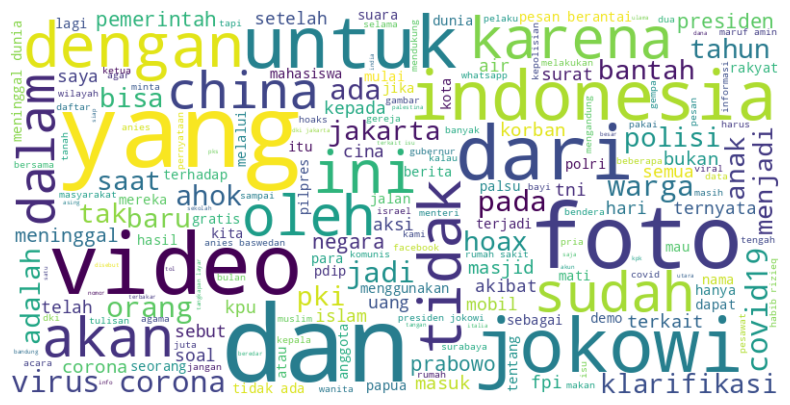

In [14]:
# Gabungkan semua teks menjadi satu string
all_text = ' '.join(hoax[text_column])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

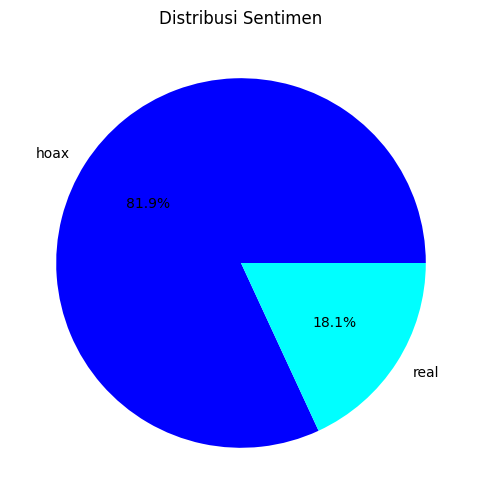

In [15]:
sentiment_distribution = hoax['label'].value_counts()

# Buat grafik distribusi sentimen dalam bentuk diagram pie
plt.figure(figsize=(6, 6))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'cyan'])
plt.title('Distribusi Sentimen')
plt.ylabel('')  # Menghapus label sumbu Y

plt.show()

In [16]:
# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    # Tokenisasi teks menggunakan NLTK
    tokens = word_tokenize(text)

    return tokens

# Terapkan fungsi ke kolom teks pada DataFrame menggunakan .loc
hoax.loc[:, 'Tokens'] = hoax.loc[:, text_column].apply(tokenize_text)

# Cetak informasi dataset setelah tokenisasi
print(hoax[['Tokens', sentiment_column]].head())

                                              Tokens label
0  [pemakaian, masker, menyebabkan, penyakit, leg...  hoax
1  [instruksi, gubernur, jateng, tentang, penilan...  hoax
2  [foto, jim, rohn, jokowi, adalah, presiden, te...  hoax
3  [ini, bukan, politik, tapi, kenyataan, pak, jo...  hoax
4  [foto, kadrun, kalo, lihat, foto, ini, panas, ...  hoax


In [17]:
# Fungsi untuk melakukan stopword removal
def remove_stopwords(tokens):
    # Mengambil stopword dalam bahasa Inggris
    stop_words = set(stopwords.words('english'))
    # Menghapus stopword dari tokenisasi
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Membuat DataFrame
hoax_df = pd.DataFrame(hoax)

# Kolom teks pada dataset
text_column = 'text_column'

# Terapkan fungsi stopword removal ke kolom Tokens
hoax['Tokens'] = hoax['Tokens'].apply(remove_stopwords)

In [18]:
# Fungsi untuk melakukan stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Fungsi untuk melakukan lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Terapkan fungsi stemming ke kolom Tokens pada dataset
hoax['Stemmed_Tokens'] = hoax['Tokens'].apply(stem_text)

# Terapkan fungsi lemmatization ke kolom Tokens pada dataset
hoax['Lemmatized_Tokens'] = hoax['Tokens'].apply(lemmatize_text)

# Cetak informasi dataset setelah tokenisasi, stemming, dan lemmatization
print(hoax[['Tokens', 'Stemmed_Tokens', 'Lemmatized_Tokens', sentiment_column]].head())

                                              Tokens  \
0  [pemakaian, masker, menyebabkan, penyakit, leg...   
1  [instruksi, gubernur, jateng, tentang, penilan...   
2  [foto, jim, rohn, jokowi, adalah, presiden, te...   
3  [ini, bukan, politik, tapi, kenyataan, pak, jo...   
4  [foto, kadrun, kalo, lihat, foto, ini, panas, ...   

                                      Stemmed_Tokens  \
0  [pemakaian, masker, menyebabkan, penyakit, leg...   
1  [instruksi, gubernur, jateng, tentang, penilan...   
2  [foto, jim, rohn, jokowi, adalah, presiden, te...   
3  [ini, bukan, politik, tapi, kenyataan, pak, jo...   
4  [foto, kadrun, kalo, lihat, foto, ini, pana, d...   

                                   Lemmatized_Tokens label  
0  [pemakaian, masker, menyebabkan, penyakit, leg...  hoax  
1  [instruksi, gubernur, jateng, tentang, penilan...  hoax  
2  [foto, jim, rohn, jokowi, adalah, presiden, te...  hoax  
3  [ini, bukan, politik, tapi, kenyataan, pak, jo...  hoax  
4  [foto, kadrun, kal

In [21]:
# Asumsi memiliki kolom 'Lemmatized_Tokens' yang berisi teks yang sudah diproses
dokumen = hoax['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens))

# Menggunakan Sastrawi untuk mendapatkan stop words bahasa Indonesia
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()

# Buat representasi bag-of-words dengan menggunakan stop words bahasa Indonesia
vectorizer = CountVectorizer(max_features=1000, stop_words=stopwords)
X = vectorizer.fit_transform(dokumen)


In [23]:
# Tentukan jumlah topik
num_topics = 5  # Anda dapat menyesuaikan ini berdasarkan kebutuhan spesifik Anda

# Buat dan latih model LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [24]:
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topik #{topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print()


Topik #1:
['berita', 'uang', 'akun', 'video', 'polisi', 'tni', 'jadi', 'hoax', 'jokowi', 'foto']

Topik #2:
['pemerintah', 'video', '2019', 'prabowo', 'rumah', 'foto', 'surat', 'presiden', 'jokowi', 'indonesia']

Topik #3:
['ahok', 'bantah', 'jokowi', 'jakarta', 'isu', 'aksi', 'anak', 'meninggal', 'klarifikasi', 'terkait']

Topik #4:
['berantai', 'hari', '2020', 'masuk', 'covid19', 'air', 'pesan', 'video', 'virus', 'corona']

Topik #5:
['gratis', 'muslim', 'warga', 'foto', 'china', 'video', 'orang', 'covid19', 'pki', 'islam']



In [25]:
# Asumsi Anda memiliki kolom 'Lemmatized_Tokens' yang berisi teks yang sudah diproses
hoax['Processed_Text'] = hoax['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens)) #yang dipilih adalah lemmatized

# Inisialisasi StopWordRemover dari Sastrawi untuk Bahasa Indonesia
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Hapus stop words dari dokumen
hoax['Processed_Text'] = hoax['Processed_Text'].apply(stopword_remover.remove)

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=[])

# Ekstraksi fitur menggunakan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(hoax['Processed_Text'])

# Konversi hasil ekstraksi fitur menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil ekstraksi fitur dengan kolom label sentimen
final_data = pd.concat([tfidf_df, hoax[sentiment_column]], axis=1)

# Cetak informasi dataset setelah ekstraksi fitur
print(final_data.head())

   100  2014  2016  2017  2018  2019  2019gantipresiden  2020  212  411  ...  \
0  0.0   0.0   0.0   0.0   0.0   0.0                0.0   0.0  0.0  0.0  ...   
1  0.0   0.0   0.0   0.0   0.0   0.0                0.0   0.0  0.0  0.0  ...   
2  0.0   0.0   0.0   0.0   0.0   0.0                0.0   0.0  0.0  0.0  ...   
3  0.0   0.0   0.0   0.0   0.0   0.0                0.0   0.0  0.0  0.0  ...   
4  0.0   0.0   0.0   0.0   0.0   0.0                0.0   0.0  0.0  0.0  ...   

   widodo  wilayah  wiranto  wuhan  yang  yogyakarta  yusuf  zon  zona  label  
0     0.0      0.0      0.0    0.0   0.0         0.0    0.0  0.0   0.0   hoax  
1     0.0      0.0      0.0    0.0   0.0         0.0    0.0  0.0   0.0   hoax  
2     0.0      0.0      0.0    0.0   0.0         0.0    0.0  0.0   0.0   hoax  
3     0.0      0.0      0.0    0.0   0.0         0.0    0.0  0.0   0.0   hoax  
4     0.0      0.0      0.0    0.0   0.0         0.0    0.0  0.0   0.0   hoax  

[5 rows x 1001 columns]


In [27]:
# Dengan asumsi 'final_data' adalah DataFrame Anda dan 'label' adalah nama kolom label
X = final_data.drop('label', axis=1)
y = final_data['label']

# Ubah label string menjadi nilai numerik
y = y.map({'hoax': 1, 'real': 0})  # Ganti 'hoax' dan 'real' dengan nilai label yang sebenarnya

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fiturnya
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bentuk ulang data untuk input LSTM (dengan asumsi X memiliki bentuk 2D)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))  # Dengan asumsi klasifikasi biner (sigmoid untuk biner, softmax untuk multikelas)

# Kompilasi modelnya
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluasi model pada set pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi Model: {accuracy * 100:.2f}%')


Epoch 1/50
85/85 [==============================] - 45s 467ms/step - loss: 0.5288 - accuracy: 0.8053 - val_loss: 0.4790 - val_accuracy: 0.8154
Epoch 2/50
85/85 [==============================] - 38s 454ms/step - loss: 0.4814 - accuracy: 0.8146 - val_loss: 0.4794 - val_accuracy: 0.8154
Epoch 3/50
85/85 [==============================] - 45s 521ms/step - loss: 0.4831 - accuracy: 0.8146 - val_loss: 0.4791 - val_accuracy: 0.8154
Epoch 4/50
85/85 [==============================] - 32s 381ms/step - loss: 0.4811 - accuracy: 0.8146 - val_loss: 0.4789 - val_accuracy: 0.8154
Epoch 5/50
85/85 [==============================] - 44s 521ms/step - loss: 0.4825 - accuracy: 0.8146 - val_loss: 0.4786 - val_accuracy: 0.8154
Epoch 6/50
85/85 [==============================] - 36s 418ms/step - loss: 0.4821 - accuracy: 0.8146 - val_loss: 0.4791 - val_accuracy: 0.8154
Epoch 7/50
85/85 [==============================] - 36s 425ms/step - loss: 0.4802 - accuracy: 0.8146 - val_loss: 0.4826 - val_accuracy: 0.8154